In [1]:
import time
import pickle
import random
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import scipy.optimize as op

In [2]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def cost_function(theta, shapes, x, y):
    # Computes the cost function for all the training samples
    theta = unflatten_thetas(thetas,shapes)
    m = x.shape[0]
    h = feed_forward(theta, x)[-1]
    total_cost = -(1 / m) * np.sum(
        (y * np.log(h).T) + ((1 - y) * np.log(1 - h).T)
    )
    return total_cost

def feed_forward(thetas, X): #(60000, 784)
    a = [X]
    for i in range(len(thetas)):
        a.append(
            sigmoid(
                np.matmul(
                    np.hstack((
                        np.ones(len(X)).reshape(len(X), 1),
                        a[i]
                    )),
                    thetas[i].T
                )
            )
        )
    return a;


def inflate_matrixes(flat_thetas, shapes):
    layers = len(shapes) + 1
    sizes = [shape[0] * shape[1] for shape in shapes]
    steps = np.zeros(layers, dtype=int)
    
    for i in range(layers - 1):
        steps[i + 1] = steps[i] + sizes[i]
        
    return [
        np.array(flat_thetas[steps[i]: steps[i + 1]]).reshape(*shapes[i])
        for i in range(layers - 1)
    ]
    

In [3]:
def jacobian(flat_thetas, shapes, X, Y):
    m, layers = len(X), len(shapes) + 1
    thetas = inflate_matrixes(flat_thetas, shapes)
    a = feed_forward(thetas, X)
    deltas = [*range(layers - 1), a[-1] - Y]
    
    #backward_prop
    #for i in range(layers - 2, 0, -1):
    
    #return flatten_list([
    #    ...
    #])
    
def backward_prop(thetas, shapes, X, Y):
    thetas = unflatten_zetas(thetas,shapes)
    m,_ = X.shape
    delta = copy.deepcopy(thetas)
    for i in delta: 
        i[:] = 0
    a = feed_forward(thetas, X)
    first_delta = a[-1] - Y.T
    deltas = [first_delta]
    #backward_prop
    for i in reversed(range(1, len(thetas))):
        first_delta = np.multiply(
            np.matmul(thetas[i].T[1:,:], first_delta),
            np.multiply(a[i], (1-a[i]))
            )
        deltas.append(first_delta)
    
    #deltas = list(reversed(deltas))
    for i in range(len(delta)):
        temp_shape = activation_trace[i].shape
        multi_res = np.matmul(
            deltas[i + 1],
            np.vstack([np.ones((1,temp_shape[1])),a[i]]).T
            )
        delta[i] += multi_res / m
    return flatten_thetas(delta)[0]
    


In [4]:
#def flatten_list(thetas):
#    flat = np.array([])
#    for i in thetas:
#        flat = np.append(flat, i.flatten())
#    flat.flatten()
#    return flat

def flatten_thetas(thetas):
    flat = np.asarray([])
    shapes = []
    for i in thetas:
        shapes.append(i.shape)
        flat = np.concatenate((flat,np.ravel(i)))
    return (flat,shapes)

def unflatten_thetas(flat_thetas,shapes):
    res = []
    for i in shapes:
        cantidad = i[0] * i[1]  
        res.append(flat_thetas[:cantidad].reshape(i))
    return res 

In [5]:
hiddenNeurons = 100
outputNeurons = 10

In [6]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
m, n = X_train.shape
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)

In [7]:
X_train = X_train / 1000
X_test = X_test / 1000
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [8]:
norm = MinMaxScaler()

#X_train_scale = norm.fit_transform(X_train)
#X_test_scale = norm.fit_transfrom(X_test)

In [9]:
"""
theta_shapes = np.array([
    [hiddenNeurons, n + 1],
    [outputNeurons, hiddenNeurons + 1]
])
theta_shapes
"""
NETWORK_ARCHITECTURE = np.array([
    n,
    hiddenNeurons,
    outputNeurons
])

theta_shapes = np.hstack((
    NETWORK_ARCHITECTURE[1:].reshape(len(NETWORK_ARCHITECTURE) - 1, 1),
    (NETWORK_ARCHITECTURE[:-1] + 1).reshape(len(NETWORK_ARCHITECTURE) - 1, 1)
))
theta_shapes

array([[500, 785],
       [ 10, 501]])

In [88]:
flat_thetas = flatten_thetas([
    np.random.rand(*theta_shape)
    for theta_shape in theta_shapes
])
print(flat_thetas[1])
print(flat_thetas[0])

[(500, 785), (10, 501)]
[0.05386764 0.53377819 0.26971144 ... 0.39530917 0.67642036 0.92519309]


In [90]:
thetas = np.array(inflate_matrixes(
    flat_thetas[0],
    theta_shapes
))
thetas

array([array([[0.05386764, 0.53377819, 0.26971144, ..., 0.5482075 , 0.84204866,
        0.14209475],
       [0.11868583, 0.34397264, 0.8418842 , ..., 0.60894022, 0.14069629,
        0.20271135],
       [0.75669235, 0.61838469, 0.16428043, ..., 0.71029638, 0.12442723,
        0.04724144],
       ...,
       [0.44603841, 0.60672223, 0.49359502, ..., 0.04509297, 0.53728107,
        0.49464382],
       [0.10959239, 0.59057311, 0.46964916, ..., 0.2477778 , 0.86891432,
        0.65481043],
       [0.36698278, 0.3470439 , 0.09044461, ..., 0.13507842, 0.38933835,
        0.27397784]]),
       array([[0.80986229, 0.13902861, 0.84735787, ..., 0.42586051, 0.56499613,
        0.47060493],
       [0.07338055, 0.51029916, 0.67939421, ..., 0.67141563, 0.13222967,
        0.16407801],
       [0.42882843, 0.40274867, 0.68142941, ..., 0.11080509, 0.87395329,
        0.83861241],
       ...,
       [0.77405982, 0.44018474, 0.27013455, ..., 0.61875421, 0.10725159,
        0.68029461],
       [0.57614964, 

In [91]:
# Predict
a = feed_forward(thetas, X_train_scale)
a

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]])]

## Example image that will be predicted

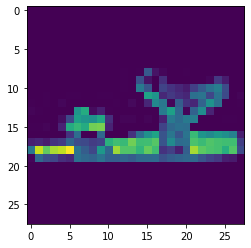

cat: 5


In [92]:
verificacion = plt.imshow(X_train[-1].reshape(28,28))
plt.show()
print("cat:", y_train[-1])

In [94]:
res = op.minimize(
    fun=cost_function,
    x0=flat_thetas[0],
    args=(flat_thetas[1],X_train,Y_train),
    method='L-BFGS-B',
    jac=backward_prop,
    options={
        'disp':True,
        'maxiter':500
    }
)

ValueError: cannot reshape array of size 2 into shape (500,785)